In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 98.9MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.6MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
#concept use karta keras generator: they divide whole data into batches
#generators

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',   #it will assign cat as 0 and dog as 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',   #it will assign cat as 0 and dog as 1
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#20000 file in train with 2 classes dog and cat
#5000 file in test with 2 classes dog and cat
#now  the images we saved this is in numpy array format and the proble is that nu[py values lies 0 to 256
# means we have to normalizr the images between 0 to 1


Normalization Function


In [ ]:
def process(image,label):
  # normalize the pixel values by scalling them between 0 to 1
   normalized_images=tf.cast(image/255. ,tf.float32)
   return normalized_images ,label

dataset Mapping

In [ ]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model:

#1st convolution layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd convolution layers
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


#3rd convolution layers
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#4th convolution layers
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Add Flatten layers
model.add(Flatten())

#FullyConnected layers
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss=binary_crossentropy,metrics=['accuracy'])

In [ ]:
hist=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 112ms/step - loss: 1.2241 - accuracy: 0.5393 - val_loss: 0.6711 - val_accuracy: 0.6068
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.6478 - accuracy: 0.6210 - val_loss: 0.6462 - val_accuracy: 0.6294
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5636 - accuracy: 0.7090 - val_loss: 0.5086 - val_accuracy: 0.7544
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4866 - accuracy: 0.7710 - val_loss: 0.4559 - val_accuracy: 0.7892
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4274 - accuracy: 0.8118 - val_loss: 1.3563 - val_accuracy: 0.5100
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3513 - accuracy: 0.8511 - val_loss: 0.3928 - val_accuracy: 0.8226
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2678 - accuracy: 0.8936 - val_loss: 0.3729 - val_ac

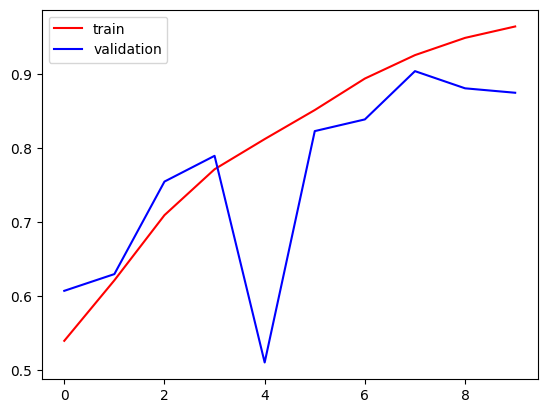

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

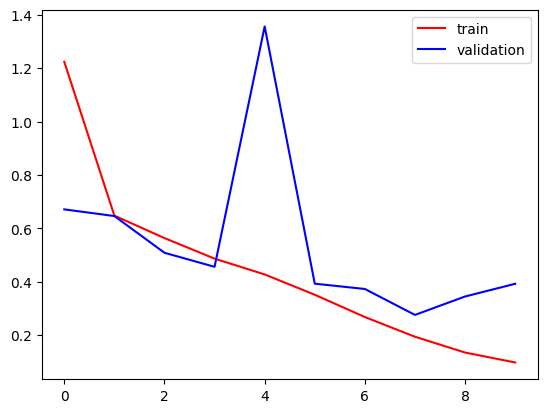

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 230ms/step


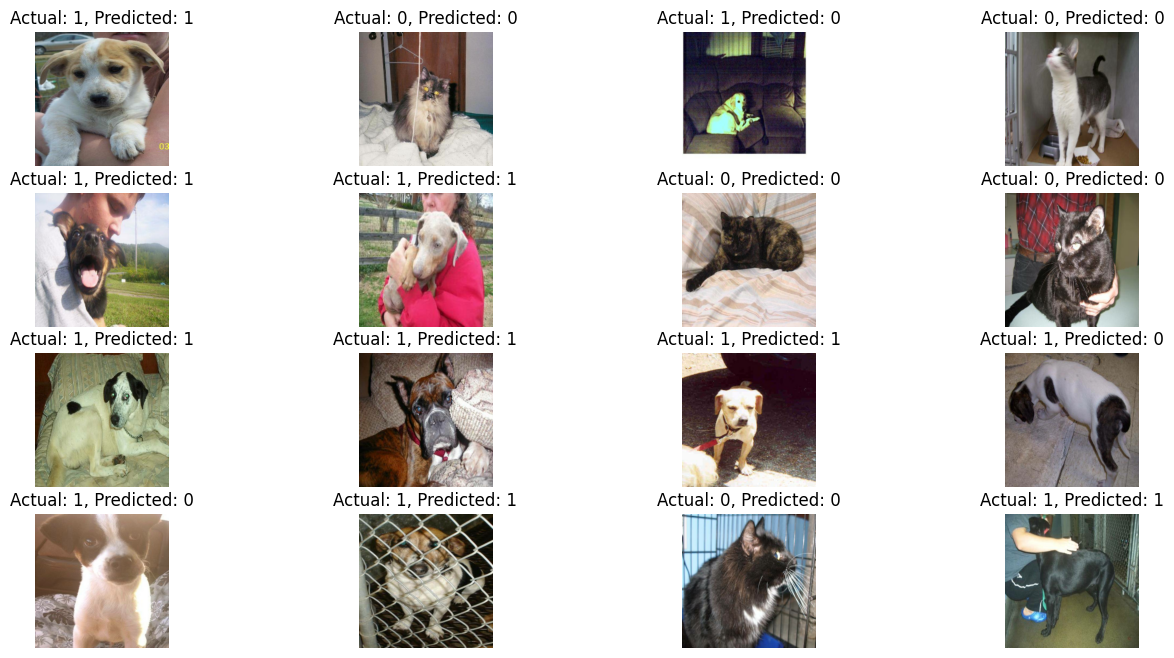

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of test data
for images, labels in validation_ds.take(1):
    # Normalize the images
    images = images.numpy()

    # Make predictions
    predictions = model.predict(images)

    # Convert the predicted probabilities to class labels (0 or 1)
    predicted_labels = np.round(predictions).flatten().astype(int)

    # Display the actual and predicted images
    plt.figure(figsize=(16, 8))
    for i in range(16):  # Display the first 16 images
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i])
        plt.title(f'Actual: {labels[i]}, Predicted: {predicted_labels[i]}')
        plt.axis('off')

    plt.show()


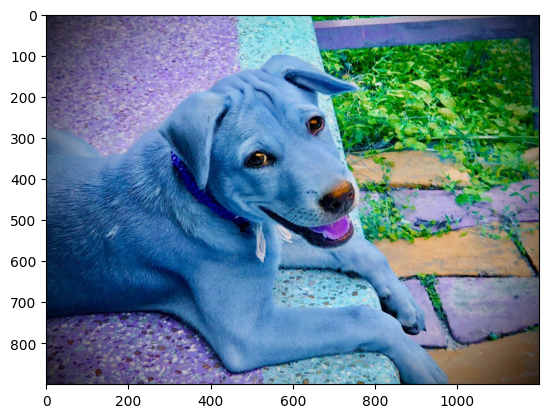

In [ ]:
import cv2
test_img=cv2.imread('/content/Dog_.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(900, 1200, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)


1/1 [==============================] - 0s 43ms/step


array([[1.]], dtype=float32)

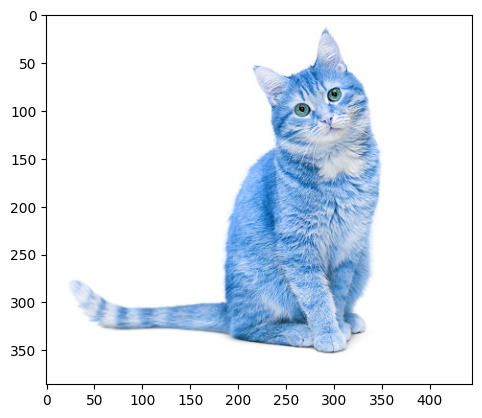

In [ ]:
import cv2
test_img_1=cv2.imread('/content/cat_1.jpg')
plt.imshow(test_img_1)

In [ ]:
test_img_1.shape

(386, 445, 3)

In [ ]:
test_img_1=cv2.resize(test_img_1,(256,256))

In [ ]:
test_input_1=test_img_1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input_1)

1/1 [==============================] - 0s 49ms/step


array([[1.]], dtype=float32)

here they predict cat as dog
so, next part will be make robust model so that it predict correctly.
